## 預測客戶是否流失

### 讀取資料

In [65]:
# Python for Data Analysis: Pandas
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/pydeeplearning/master/data/customer_churn.csv', index_col=0, header = 0)
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


### 資料預處理

In [3]:
df = df.iloc[:,3:]

In [5]:
df.head()

,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
2,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
3,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
4,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
5,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [9]:
def convertYesNo(ele):
    if ele == 'yes':
        return 1
    else:
        return 0
    
convertYesNo('no')

0

In [11]:
df['international_plan'] = df['international_plan'].map(convertYesNo)

In [ ]:
#df['international_plan'] = df['international_plan'].map(lambda ele: 1 if ele == 'yes' else 0)

In [12]:
df['voice_mail_plan'] = df['voice_mail_plan'].map(convertYesNo)

In [13]:
df['churn'] = df['churn'].map(convertYesNo)

In [14]:
df.head()

,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
2,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
3,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
4,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
5,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [15]:
y = df.iloc[:,-1]
x = df.iloc[:,:-1]

In [18]:
#x

### 建立訓練與測試資料

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 123)

In [20]:
x.shape

(3333, 16)

In [21]:
y.shape

(3333,)

In [22]:
x_train.shape

(2233, 16)

In [23]:
y_train.shape

(2233,)

In [24]:
x_test.shape

(1100, 16)

In [26]:
y_test.shape

(1100,)

### 數據標準化

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [63]:
?StandardScaler
#x_train
#x_test

### 使用Keras 建立 ANN

In [33]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD

In [34]:
classifier = Sequential()
# Dense = X * W + b
classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = 16))
classifier.add(Dropout(rate=0.1))
classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dropout(rate=0.1))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [36]:
history = classifier.fit(x_train, y_train,
                    batch_size=10,
                    epochs=100,
                    verbose =0,
                    validation_data=(x_test, y_test))

### 評估模型

In [52]:
from sklearn.metrics import accuracy_score
y_pred    = classifier.predict(x_test)
predicted = classifier.predict(x_test) > 0.5

accuracy_score(y_test, predicted)

0.8827272727272727

In [53]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predicted)

array([[938,  12],
       [117,  33]], dtype=int64)

### 繪製ROC Curve

In [54]:
from sklearn.metrics import roc_curve
fpr_ary, tpr_ary, thresholds = roc_curve(y_test, y_pred)

Populating the interactive namespace from numpy and matplotlib


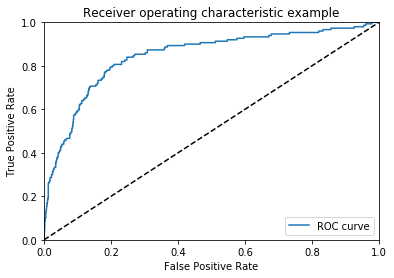

In [55]:
%pylab inline
import matplotlib.pyplot as plt
plt.plot(fpr_ary, tpr_ary, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### 建立不同學習模型

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

clf1 = DecisionTreeClassifier()
clf1.fit(x_train, y_train)

clf2 = SVC(probability = True)
clf2.fit(x_train, y_train)

clf3 = LogisticRegression()
clf3.fit(x_train, y_train)

clf4 = RandomForestClassifier()
clf4.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### 使用ROC Curve 比較模型

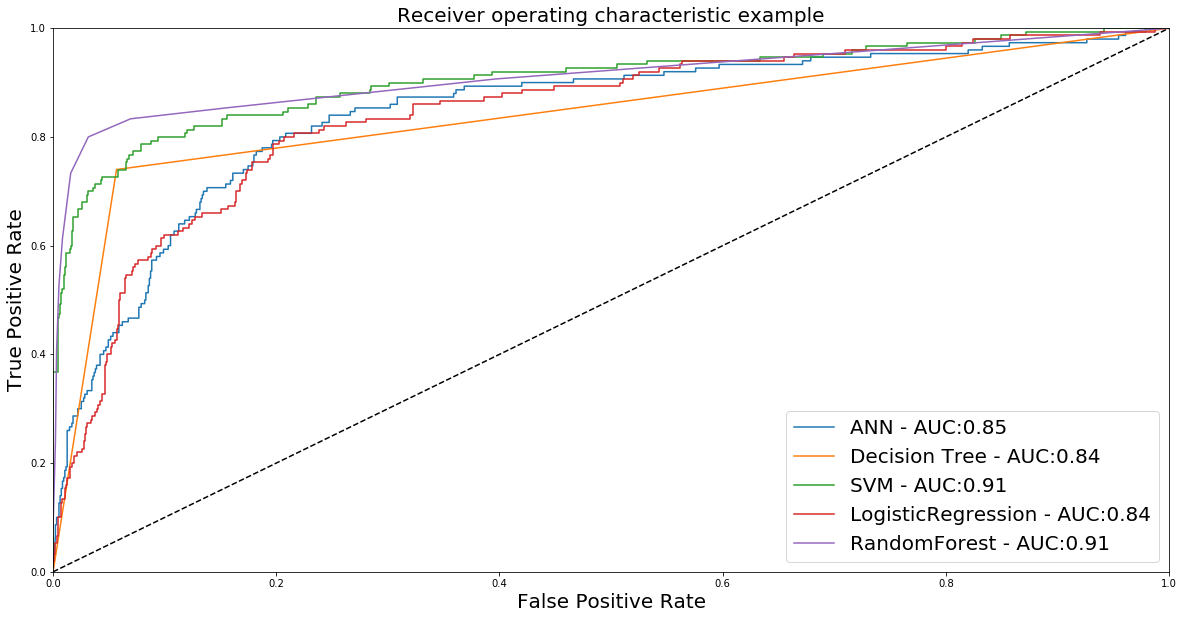

In [62]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

plt.figure(figsize= [20,10])
for clf, title in zip([classifier,clf1,clf2,clf3, clf4], ['ANN','Decision Tree', 'SVM', 'LogisticRegression', 'RandomForest']):
    if title != 'ANN':
        probas_ = clf.fit(x_train, y_train).predict_proba(x_test)
        fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    else:
        y_pred = clf.predict(x_test)
        fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr, label='%s - AUC:%.2f'%(title, auc(fpr, tpr)) )
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate', fontsize = 20)
plt.title('Receiver operating characteristic example', fontsize = 20)
plt.legend(loc="lower right", fontsize = 20)
plt.show()

### ZIP

In [60]:
a = ['a', 'b', 'c']
b = [1  ,  2 ,   3]

for i in range(0, len(a)):
    print(a[i], b[i])

a 1
b 2
c 3


In [61]:
for i, j in zip(a,b):
    print(i,j)

a 1
b 2
c 3


### 取得模型權重

In [69]:
len(classifier.get_weights())

6

In [70]:
W = classifier.get_weights()

In [73]:
W[0].shape

(16, 8)

In [75]:
W[1].shape

(8,)

In [77]:
W[2].shape

(8, 8)

In [79]:
W[3].shape

(8,)

In [82]:
W[4].shape

(8, 1)

In [84]:
W[5].shape

(1,)

### 模型保存

#### Scikit Learn Model Persistence
- http://scikit-learn.org/stable/modules/model_persistence.html

In [91]:
## sklearn
from sklearn.externals import joblib
joblib.dump(clf1, 'decisionTree.pkl') 

['decisionTree.pkl']

In [92]:
clf_test = joblib.load('decisionTree.pkl') 

In [93]:
clf_test.predict(x_test)

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

#### Keras Persist Model
- https://keras.io/getting-started/faq/

In [94]:
## keras
classifier.save('ann.pkl')

In [95]:
classifier_test = keras.models.load_model('ann.pkl')

In [90]:
classifier_test.predict(x_test)

array([[0.5704438 ],
       [0.15745814],
       [0.02516353],
       ...,
       [0.04971304],
       [0.01059475],
       [0.09091126]], dtype=float32)

## 使用ANN 辨識手寫數字

In [96]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers import Activation, Dense

In [97]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [98]:
x_train.shape

(60000, 28, 28)

In [99]:
x_test.shape

(10000, 28, 28)

In [100]:
x_train = x_train.reshape(60000, 784)
x_test  = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')
x_train /= 255
x_test  /= 255

In [102]:

n_classes   = 10 
y_train = keras.utils.to_categorical(y_train, n_classes)
y_test  = keras.utils.to_categorical(y_test, n_classes)

In [104]:

n_hidden_1  = 256 
n_hidden_2 = 256 
n_input    = 784 
n_classes  = 10 

training_epochs = 15
batch_size = 100

In [105]:
model = keras.Sequential()
model.add(Dense(n_hidden_1, activation='relu', input_shape=(n_input,)))
model.add(Dense(n_hidden_2, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [106]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=training_epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 3s 46us/step - loss: 0.2415 - acc: 0.9301 - val_loss: 0.1111 - val_acc: 0.9654
Epoch 2/15
60000/60000 [==============================] - 2s 41us/step - loss: 0.0912 - acc: 0.9718 - val_loss: 0.1063 - val_acc: 0.9679
Epoch 3/15
60000/60000 [==============================] - 3s 42us/step - loss: 0.0614 - acc: 0.9805 - val_loss: 0.0712 - val_acc: 0.9782
Epoch 4/15
60000/60000 [==============================] - 2s 41us/step - loss: 0.0439 - acc: 0.9863 - val_loss: 0.0795 - val_acc: 0.9768
Epoch 5/15
60000/60000 [==============================] - 3s 42us/step - loss: 0.0320 - acc: 0.9897 - val_loss: 0.0772 - val_acc: 0.9773
Epoch 6/15
60000/60000 [==============================] - 2s 41us/step - loss: 0.0243 - acc: 0.9926 - val_loss: 0.0791 - val_acc: 0.9776
Epoch 7/15
60000/60000 [==============================] - 3s 42us/step - loss: 0.0214 - acc: 0.9928 - val_loss: 0.0645 - val_acc

### GIMP 
- https://www.gimp.org/downloads/

In [112]:
def relu_function(x):
    return np.maximum(0,x)

x = np.array([-1,1,2])
relu_function(x)


array([0, 1, 2])

## 使用CNN 辨識手寫數字

### 引用套件

In [113]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Activation, Dense, Flatten, Conv2D, MaxPooling2D

### 讀取MINIST 數據

In [114]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [115]:
x_train = x_train.reshape(60000, 28,28,1)
x_test = x_test.reshape(10000, 28,28,1)
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')
x_train /= 255
x_test  /= 255

In [116]:
y_train = keras.utils.to_categorical(y_train, n_classes)
y_test  = keras.utils.to_categorical(y_test, n_classes)

### 設定網路參數

In [117]:
n_hidden_1 = 256 
n_classes  = 10 

training_epochs = 15
batch_size = 100

### 建立 CNN

In [118]:
model = keras.Sequential()

model.add(Conv2D(
            filters=16,
            kernel_size = (3,3),
            padding = 'same',
            input_shape = (28,28,1), 
            activation = 'relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(n_hidden_1, activation='relu'))

model.add(Dense(n_classes, activation='softmax'))

In [119]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

### 訓練神經網路

In [120]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=training_epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 23s 382us/step - loss: 0.2033 - acc: 0.9414 - val_loss: 0.0800 - val_acc: 0.9751
Epoch 2/15
60000/60000 [==============================] - 23s 378us/step - loss: 0.0678 - acc: 0.9801 - val_loss: 0.0605 - val_acc: 0.9806
Epoch 3/15
60000/60000 [==============================] - 22s 366us/step - loss: 0.0434 - acc: 0.9867 - val_loss: 0.0429 - val_acc: 0.9843
Epoch 4/15
60000/60000 [==============================] - 22s 366us/step - loss: 0.0307 - acc: 0.9907 - val_loss: 0.0434 - val_acc: 0.9854
Epoch 5/15
60000/60000 [==============================] - 22s 370us/step - loss: 0.0231 - acc: 0.9931 - val_loss: 0.0375 - val_acc: 0.9874
Epoch 6/15
60000/60000 [==============================] - 22s 370us/step - loss: 0.0157 - acc: 0.9951 - val_loss: 0.0510 - val_acc: 0.9832
Epoch 7/15
60000/60000 [==============================] - 22s 372us/step - loss: 0.0127 - acc: 0.9962 - val_loss: 0.

## MNIST Performance
- http://yann.lecun.com/exdb/mnist/

## 使用CNN 分類貓與狗

In [134]:

# Importing the Keras libraries and packages# Import 
from keras.models import Sequential 
from keras.layers import Conv2D
from keras.layers import MaxPooling2D 
from keras.layers import Flatten
from keras.layers import Dense

# Initialising the CNN
classifier = Sequential()

In [135]:
# 1. Convolution  
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64,
3), activation = 'relu'))

In [136]:
# 2. Max Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [137]:
# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [138]:
# 3. Flattening
classifier.add(Flatten())

In [139]:
# 4. Fully Connection
classifier.add(Dense(units = 128, activation = 'relu')) 
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [140]:
classifier.compile(optimizer = 'adam', loss =
'binary_crossentropy', metrics = ['accuracy'])

In [141]:
from keras.preprocessing.image import ImageDataGenerator

In [142]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2, 
                                   horizontal_flip = True)

In [143]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [144]:
training_set = train_datagen.flow_from_directory(
    'dataset/training_set', target_size = (64, 64),
     batch_size = 32,
     class_mode = 'binary')

Found 8000 images belonging to 2 classes.


In [145]:
test_set = test_datagen.flow_from_directory(
    'dataset/test_set', target_size = (64, 64),
    batch_size = 32, 
    class_mode = 'binary')

Found 2000 images belonging to 2 classes.


In [ ]:
classifier.fit_generator(training_set, steps_per_epoch = 8000,
epochs = 2, validation_data = test_set, validation_steps = 2000)

Epoch 1/2
  17/8000 [..............................] - ETA: 26:22 - loss: 0.7127 - acc: 0.5202